 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
Whalecsv = Path("../Starter_Code/Resources/whale_returns.csv")

In [3]:
Whalecsv

WindowsPath('../Starter_Code/Resources/whale_returns.csv')

In [4]:
whalesr_df = pd.read_csv(Whalecsv, index_col="Date", parse_dates = [0], infer_datetime_format =True) 
whalesr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whalesr_df.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [6]:
# Drop nulls
whalesr_df.dropna(inplace=True)
whalesr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
whalesr_df = whalesr_df.rename(columns={"Date": "Date", "SOROS FUND MANAGEMENT LLC": "Soros", "PAULSON & CO.INC. ": "Paulson", "TIGER GLOBAL MANAGEMENT LLC": "Tiger Global", "BERKSHIRE HATHAWAY INC": "BRK"})
whalesr_df.head()

,Soros,Paulson,Tiger Global,BRK
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
Algocsv = Path("../Starter_Code/Resources/algo_returns.csv")

In [9]:
Algocsv

WindowsPath('../Starter_Code/Resources/algo_returns.csv')

In [10]:
algod_df = pd.read_csv(Algocsv, index_col="Date", parse_dates = [0], infer_datetime_format =True) 
algod_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
algod_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [12]:
# Drop nulls
algod_df.dropna(inplace=True)
algod_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
Sp500csv = Path("../Starter_Code/Resources/sp500_history.csv")

In [14]:
Sp500csv

WindowsPath('../Starter_Code/Resources/sp500_history.csv')

In [15]:
Sp500h_df = pd.read_csv(Sp500csv, index_col="Date", parse_dates = [0], infer_datetime_format =True) 
Sp500h_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [16]:
# Check Data Types
Sp500h_df.dtypes

Close    object
dtype: object

In [17]:
# Fix Data Types
# This code allows me to drop the $ sign from the number
Sp500h_df['Close'] = Sp500h_df['Close'].str.replace('$','')

In [18]:
Sp500h_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [19]:
Sp500h_df["Close"] = Sp500h_df["Close"].astype(float)

In [20]:
Sp500h_df.dtypes

Close    float64
dtype: object

In [21]:
# Calculate Daily Returns
Sp500h_df.set_index('Close')
daily_returns = Sp500h_df['Close'].pct_change()
daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [22]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1648, dtype: float64

In [23]:
# Rename `Close` Column to be specific to this portfolio.
Sp500h_df = Sp500h_df.rename(columns={"Date": "Date", "Close": "SP Close"})
Sp500h_df.head()

,SP Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_WASP_df = pd.concat([whalesr_df, algod_df, daily_returns, Sp500h_df], axis="columns", join="inner")
combined_WASP_df.sort_index(inplace=True)
combined_WASP_df.columns = ['Soros', 'Paulson', 'Tiger Global', 'BRK', 'Algo 1', 'Algo 2', 'SP Daily Returns', 'SP Close']
combined_WASP_df.head()

,Soros,Paulson,Tiger Global,BRK,Algo 1,Algo 2,SP Daily Returns,SP Close
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,2079.43


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [25]:
# Plot daily returns of all portfolios
combined_WASP_df.drop(columns=['SP Close'], inplace=True)
combined_WASP_df.head()

,Soros,Paulson,Tiger Global,BRK,Algo 1,Algo 2,SP Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:xlabel='Date'>

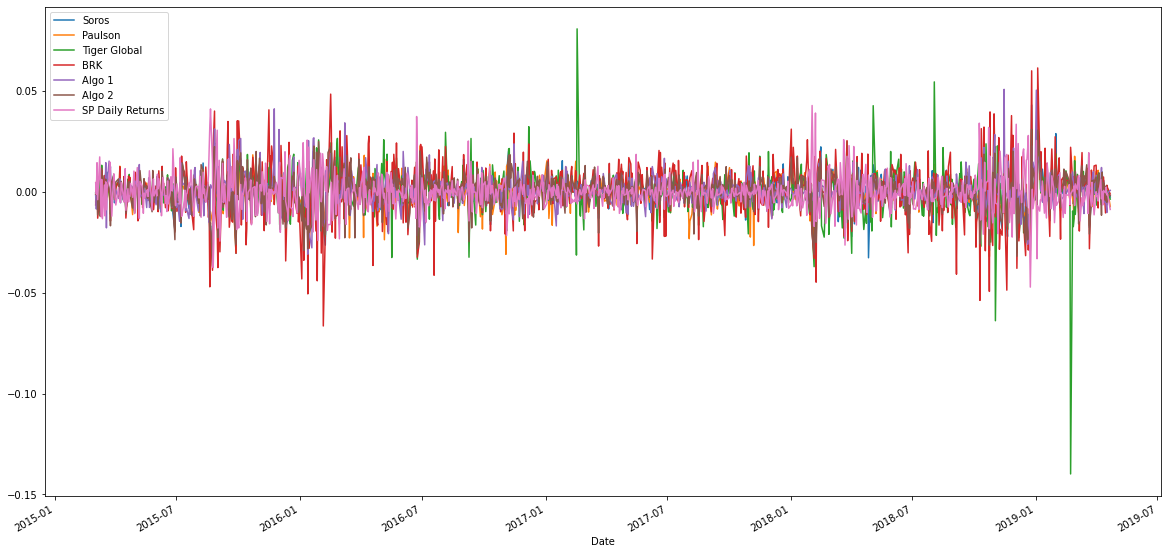

In [26]:
combined_WASP_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

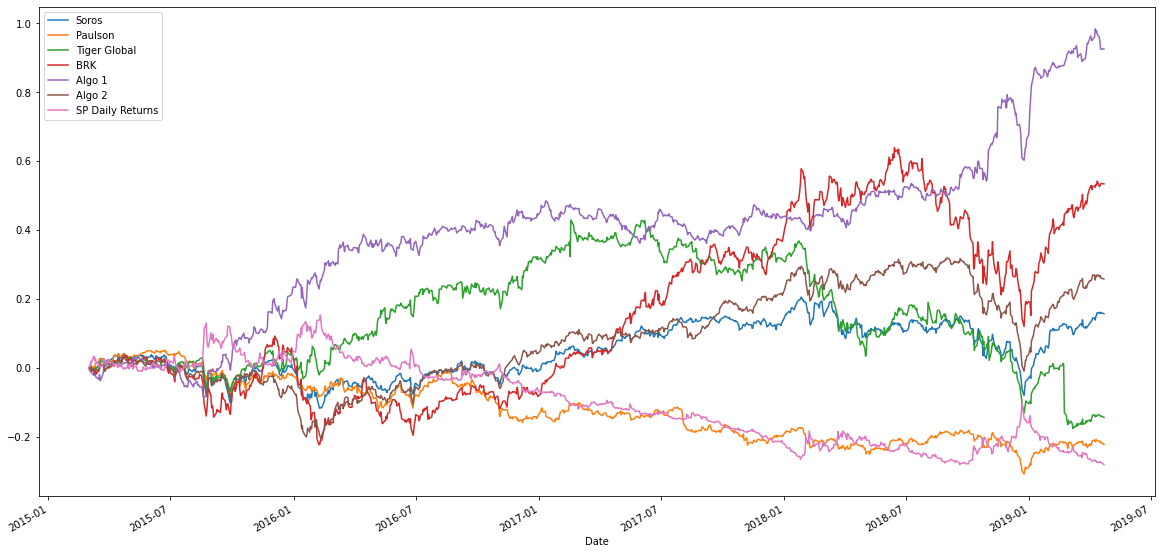

In [27]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_WASP_df).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

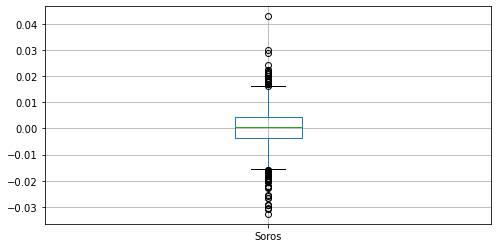

In [28]:
# Box plot to visually show risk
combined_WASP_df.boxplot(column='Soros',figsize=(8,4))

<AxesSubplot:>

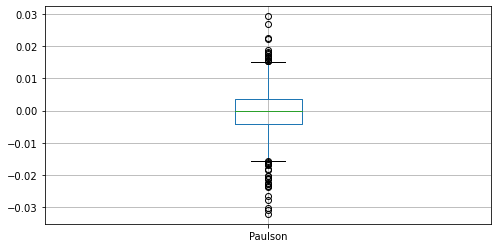

In [29]:
combined_WASP_df.boxplot(column='Paulson',figsize=(8,4))

<AxesSubplot:>

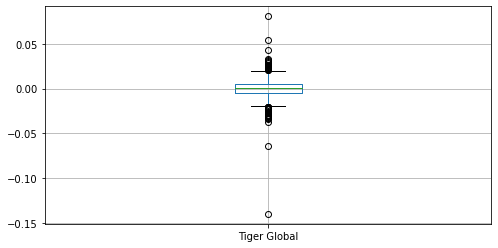

In [30]:
combined_WASP_df.boxplot(column='Tiger Global',figsize=(8,4))

<AxesSubplot:>

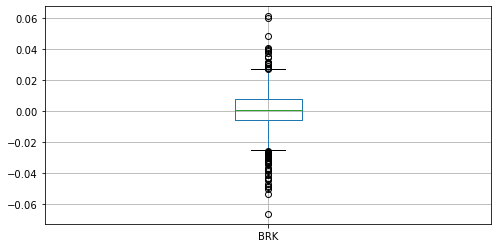

In [31]:
combined_WASP_df.boxplot(column='BRK',figsize=(8,4))

<AxesSubplot:>

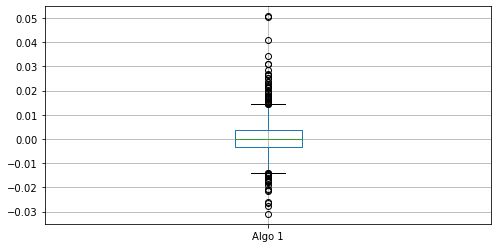

In [32]:
combined_WASP_df.boxplot(column='Algo 1',figsize=(8,4))

<AxesSubplot:>

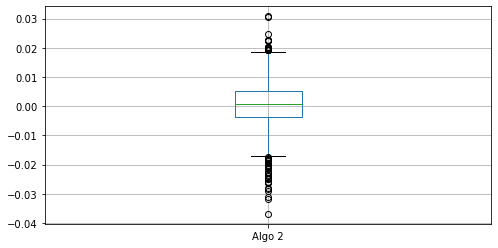

In [33]:
combined_WASP_df.boxplot(column='Algo 2',figsize=(8,4))

<AxesSubplot:>

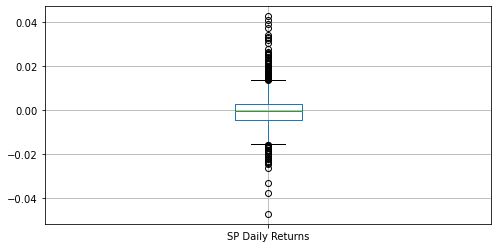

In [34]:
combined_WASP_df.boxplot(column='SP Daily Returns',figsize=(8,4))

### Calculate Standard Deviations

In [35]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_WASP_df.std()
daily_std

Soros               0.007896
Paulson             0.007026
Tiger Global        0.010897
BRK                 0.012919
Algo 1              0.007623
Algo 2              0.008341
SP Daily Returns    0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [36]:
# Calculate the daily standard deviation of S&P 500
daily_std
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std

BRK                 0.012919
Tiger Global        0.010897
SP Daily Returns    0.008587
Algo 2              0.008341
Soros               0.007896
Algo 1              0.007623
Paulson             0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BRK                 0.205079
Tiger Global        0.172989
SP Daily Returns    0.136313
Algo 2              0.132413
Soros               0.125348
Algo 1              0.121006
Paulson             0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

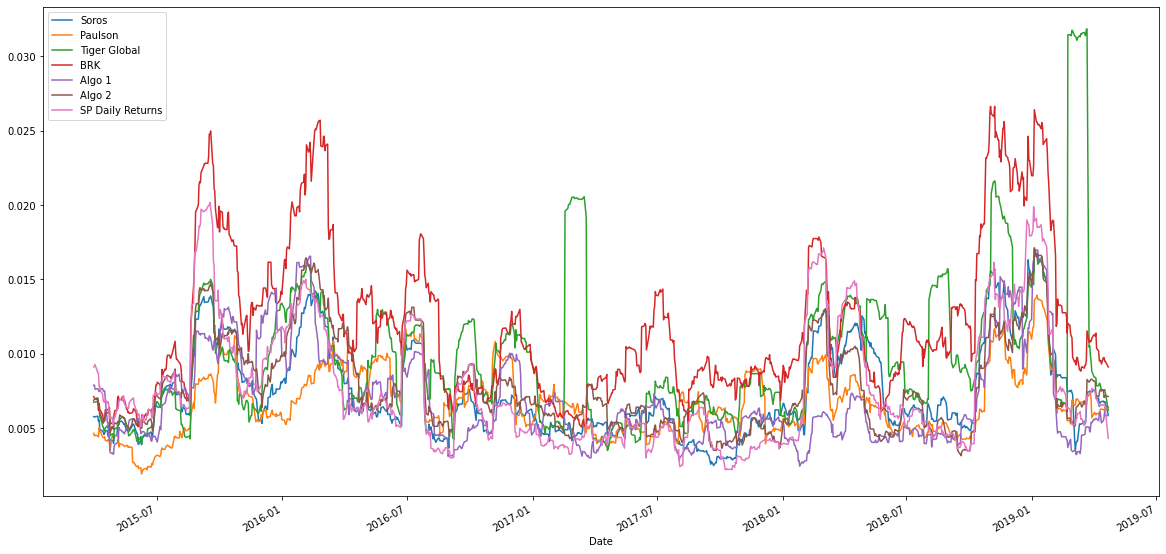

In [38]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_WASP_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_WASP_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [39]:
# Calculate the correlation
daily_return_correlation = combined_WASP_df.corr()
# Display the correlation matrix
print(daily_return_correlation)

                     Soros   Paulson  Tiger Global       BRK    Algo 1  \
Soros             1.000000  0.699823      0.561040  0.754157  0.320901   
Paulson           0.699823  1.000000      0.434308  0.545451  0.268631   
Tiger Global      0.561040  0.434308      1.000000  0.424125  0.164114   
BRK               0.754157  0.545451      0.424125  1.000000  0.291678   
Algo 1            0.320901  0.268631      0.164114  0.291678  1.000000   
Algo 2            0.826730  0.678085      0.507160  0.687756  0.287852   
SP Daily Returns  0.000574  0.013549     -0.001505 -0.013856 -0.033963   

                    Algo 2  SP Daily Returns  
Soros             0.826730          0.000574  
Paulson           0.678085          0.013549  
Tiger Global      0.507160         -0.001505  
BRK               0.687756         -0.013856  
Algo 1            0.287852         -0.033963  
Algo 2            1.000000         -0.002192  
SP Daily Returns -0.002192          1.000000  


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P 500 Returns'}, xlabel='Date'>

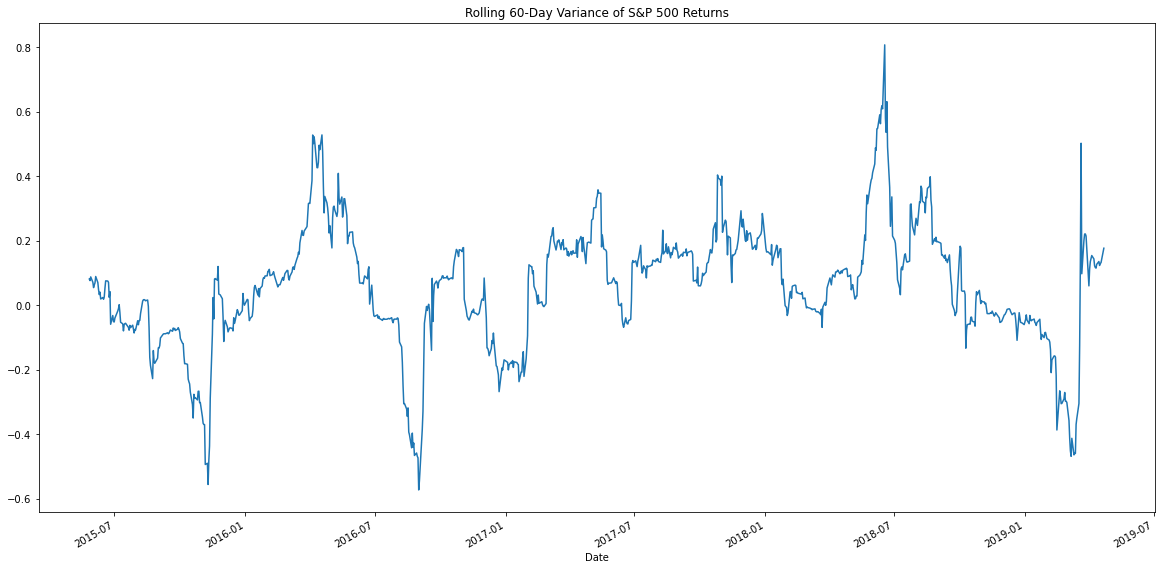

In [40]:
# Calculate covariance of a single portfolio
soros_rolling_cov = combined_WASP_df['Soros'].rolling(window=60).cov(combined_WASP_df['SP Daily Returns'])
soros_rolling_cov
# Calculate variance of S&P 500
SP5_rolling_variance = combined_WASP_df['SP Daily Returns'].rolling(window=30).var()
# Computing beta
rolling_beta = soros_rolling_cov / SP5_rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Variance of S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [41]:
# Use `ewm` to calculate the rolling window
combined_WASP_df.ewm(halflife=21).mean()

,Soros,Paulson,Tiger Global,BRK,Algo 1,Algo 2,SP Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_WASP_df.mean() * 252) / (combined_WASP_df.std() * np.sqrt(252))
sharpe_ratios

Soros               0.342894
Paulson            -0.491422
Tiger Global       -0.130186
BRK                 0.606743
Algo 1              1.369589
Algo 2              0.484334
SP Daily Returns   -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

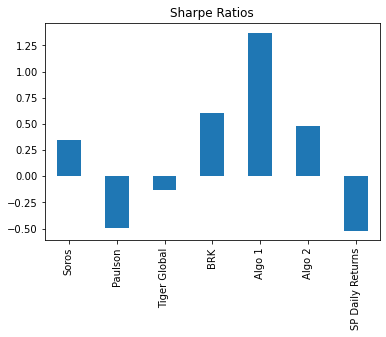

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms the both the S&P 500 and the whales portfolios; Algo 2 outperforms the S&P 500 and Soros, Paulson and Tiger Global.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!